# 第７章

In [1]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin.gz', binary=True)

## 60. 単語ベクトルの読み込みと表示
Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [8]:
model['United_States']

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

## 61. 単語の類似度
“United States”と”U.S.”のコサイン類似度を計算せよ．

In [9]:
model.similarity('United_States', 'U.S.')

0.73107743

## 62. 類似度の高い単語10件
“United States”とコサイン類似度が高い10語と，その類似度を出力せよ

In [11]:
model.most_similar('United_States', topn=10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.7400725483894348),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.6019070148468018)]

## 63. 加法構成性によるアナロジー
“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

most_similar関数は、("Spain","Madrid","Athens")をL2正規化したのち計算をしている。

similar_by_vector関数は、純粋に単語ベクトルを求めて計算しているだけ。

また、most_similar関数は、入力された文字列は結果から省いている。

In [12]:
vec = (model['Spain'] - model['Madrid'] + model['Athens'])
model.similar_by_vector(vec)

[('Athens', 0.7528455257415771),
 ('Greece', 0.6685472130775452),
 ('Aristeidis_Grigoriadis', 0.5495778322219849),
 ('Ioannis_Drymonakos', 0.5361457467079163),
 ('Greeks', 0.5351787209510803),
 ('Ioannis_Christou', 0.5330225825309753),
 ('Hrysopiyi_Devetzi', 0.5088489651679993),
 ('Iraklion', 0.5059264898300171),
 ('Greek', 0.5040615200996399),
 ('Athens_Greece', 0.5034109950065613)]

In [13]:
# こちらの方がより正確
model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'])

[('Greece', 0.6898480653762817),
 ('Aristeidis_Grigoriadis', 0.560684859752655),
 ('Ioannis_Drymonakos', 0.555290937423706),
 ('Greeks', 0.5450686812400818),
 ('Ioannis_Christou', 0.5400862693786621),
 ('Hrysopiyi_Devetzi', 0.5248445272445679),
 ('Heraklio', 0.5207759141921997),
 ('Athens_Greece', 0.5168809294700623),
 ('Lithuania', 0.5166866183280945),
 ('Iraklion', 0.5146791934967041)]

## 64. アナロジーデータでの実験
単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [ ]:
!wget http://download.tensorflow.org/data/questions-words.txt

In [14]:
# アナロジーのカテゴリ一覧
!cat questions-words.txt | grep :

: capital-common-countries
: capital-world
: currency
: city-in-state
: family
: gram1-adjective-to-adverb
: gram2-opposite
: gram3-comparative
: gram4-superlative
: gram5-present-participle
: gram6-nationality-adjective
: gram7-past-tense
: gram8-plural
: gram9-plural-verbs


In [15]:
with open('questions-words.txt', 'r') as fr, open('ans64.txt', 'w') as fw:
    for l in fr:
        line = l.replace('\n','')
        words = line.split(' ')
        if len(words) == 4:
            sim_word, similarity = model.most_similar(positive=[words[1], words[2]], negative=[words[0]])[0]
            print(f"{line} {sim_word} {similarity}", file=fw)
        else:
            print(line, file=fw)

In [16]:
!head -n 10 ans64.txt

: capital-common-countries
Athens Greece Baghdad Iraq Iraqi 0.6351870894432068
Athens Greece Bangkok Thailand Thailand 0.7137669324874878
Athens Greece Beijing China China 0.7235777378082275
Athens Greece Berlin Germany Germany 0.6734622716903687
Athens Greece Bern Switzerland Switzerland 0.4919748306274414
Athens Greece Cairo Egypt Egypt 0.7527809739112854
Athens Greece Canberra Australia Australia 0.5837326645851135
Athens Greece Hanoi Vietnam Viet_Nam 0.6276342272758484
Athens Greece Havana Cuba Cuba 0.6460990905761719


## 65. アナロジータスクでの正解率
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [2]:
import re
with open('ans64.txt', 'r') as f:
    sem_cnt = 0
    sem_cor = 0
    syn_cnt = 0
    syn_cor = 0
    sem_syn_flag = 'sem' # 意味的アナロジー or 文法的アナロジーのフラグ

    for line in f:
        words = line.split(' ')
        if len(words) == 6:
            # 意味的アナロジー
            if sem_syn_flag == 'sem':
                sem_cnt += 1
                if words[3] == words[4]: 
                    sem_cor += 1
                
            # 文法的アナロジー
            elif sem_syn_flag == 'gram':
                syn_cnt += 1
                if words[3] == words[4]: 
                    syn_cor += 1
                
        elif re.match(r'^gram', words[1]):
            sem_syn_flag = 'gram'

print(f'意味的アナロジー正解率: {sem_cor/sem_cnt:.3f}')
print(f'文法的アナロジー正解率: {syn_cor/syn_cnt:.3f}') 

意味的アナロジー正解率: 0.731
文法的アナロジー正解率: 0.740


## 66. WordSimilarity-353での評価
The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

**スピアマンの順位相関係数**
２変数間にどの程度、順位付けの直線関係があるかを調べる際に使う分析手段
データの値の大きさは関係なく、データの順位（順序）のみで決まる

In [53]:
!wget -q http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
!unzip wordsim353.zip

Archive:  wordsim353.zip
  inflating: combined.csv            
  inflating: set1.csv                
  inflating: set2.csv                
  inflating: combined.tab            
  inflating: set1.tab                
  inflating: set2.tab                
  inflating: instructions.txt        


In [3]:
import pandas as pd
df = pd.read_csv('combined.csv')
sim = []
for idx, data in df.iterrows():
    sim.append(model.similarity(data[0],data[1]))
df['Similarity'] = sim
df.head()

,Word 1,Word 2,Human (mean),Similarity
0,love,sex,6.77,0.263938
1,tiger,cat,7.35,0.517296
2,tiger,tiger,10.00,1.000000
3,book,paper,7.46,0.363463
4,computer,keyboard,7.62,0.396392


In [4]:
df['Human (mean)'].rank()

0      210.5
1      244.5
2      353.0
3      255.5
4      272.0
       ...  
348    160.0
349    318.5
350    172.5
351    180.5
352     73.0
Name: Human (mean), Length: 353, dtype: float64

In [5]:
import numpy as np
from scipy.stats import spearmanr
correlation, pvalue = spearmanr(df['Human (mean)'], df['Similarity'])

print(f'スピアマン相関係数: {correlation:.3f}')

スピアマン相関係数: 0.700


## 67. k-meansクラスタリング
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

In [6]:
import numpy as np
countries = set() # 国名の取得
with open('ans64.txt', 'r') as f:
    c_get_flag = 0 # 0:国名を取得できない, 1,3列名に国名が存在, 2:2,4列目に国名が存在
    for line in f:
        words = line.strip().split(' ')
        if len(words) == 6:
            # 1,3列目に国名が存在
            if c_get_flag == 1:
                countries.add(words[0])
                countries.add(words[2])
            # 3列目に国名が存在
            elif c_get_flag == 2:
                countries.add(words[1])
                countries.add(words[3])
        elif words[1] in ['currency', 'gram6-nationality-adjective']:
            c_get_flag = 1
        elif line[1] in ['capital-common-countries', 'capital-world']:
            c_get_flag = 2
        else:
            c_get_flag = 0

countries = list(countries)
countries_vec = [model[country] for country in countries]

In [7]:
from sklearn.cluster import KMeans

# k-meansクラスタリング
kmeans = KMeans(n_clusters=5)
kmeans.fit(countries_vec)
for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]
    print('cluster', i)
    print(', '.join([countries[k] for k in cluster]))

cluster 0
Iran, Egypt, Israel
cluster 1
Nigeria, Algeria, Spain, Colombia, Chile, Angola, Peru, Portugal, Brazil, Mexico, Argentina
cluster 2
Bulgaria, Greece, Romania, Moldova, Macedonia, Malta, Lithuania, Hungary, Belarus, Slovakia, Poland, Armenia, Croatia, Ukraine, Latvia, Russia, Albania
cluster 3
India, Japan, England, China, Cambodia, Australia, Canada, Thailand, Vietnam, Korea, Malaysia, Ireland
cluster 4
Switzerland, Austria, Norway, Germany, USA, Netherlands, Sweden, Iceland, Denmark, Italy, Europe, France


## 68. Ward法によるクラスタリング
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

最も似ている組み合わせから順番にクラスターにしていく方法で、途中過程が階層のように表せ、最終的に樹形図（デンドログラム）が生成される。

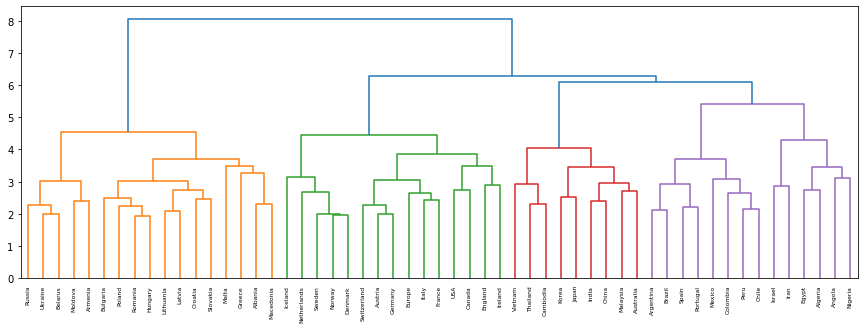

In [4]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(15, 5))
Z = linkage(countries_vec, method='ward')
dendrogram(Z, labels=countries)
plt.show()

## 69. t-SNEによる可視化
ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．

SNE（Stochastic Neighbor Embedding）

* 高次元でのデータポイント間の距離を条件付き確率に変換する
* 上記で計算した高次元でのデータポイント間の距離（条件付き確率）と、できるだけ近い低次元でのデータポイント間の距離（条件付き確率）をとる点を見つける

/usr/local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


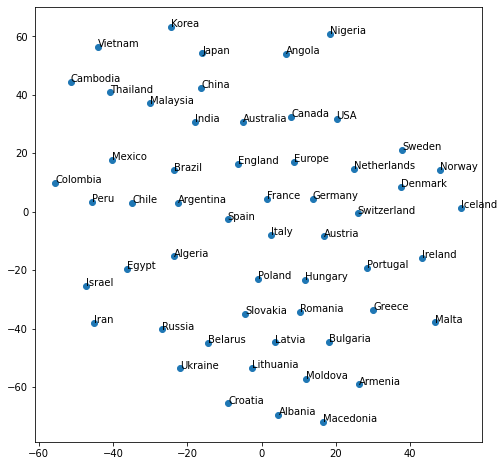

In [10]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,random_state=42)
tsne.fit(countries_vec)

plt.figure(figsize=(8, 8))
plt.scatter(tsne.embedding_[:, 0], tsne.embedding_[:, 1])
for (x, y), name in zip(tsne.embedding_, countries):
    plt.annotate(name, (x, y))
plt.show()